In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

# Importing Tensor Flow

In [2]:
import tensorflow as tf
from kaggle_datasets import KaggleDatasets

print("Tensorflow version" + tf.__version__)

D1106 23:30:51.166304798      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1106 23:30:51.166329564      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1106 23:30:51.166333433      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1106 23:30:51.166336483      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1106 23:30:51.166339294      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1106 23:30:51.166342412      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1106 23:30:51.166345268      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1106 23:30:51.

Tensorflow version2.12.0


* While importing other usefull libraries

In [3]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from matplotlib import cm
import math, re, os
from IPython.display import Image


# Detect Accelerator

In [5]:
try:
    tpu= tf.distribute.cluster_resolver.TPUClusterResolver() # Code for TPU Detection 
    print("Yes running on TPU", tpu.master())
except ValueError:
    tpu = None

Yes running on TPU 


In [6]:
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)  #Connect
    tf.tpu.experimental.initialize_tpu_system(tpu)  #Initialize
    strategy= tf.distribute. experimental.TPUStrategy(tpu)
else:
    strategy= tf.distribute.get_strategy() # DEFAULT Distributon in TENSORFLOW (CPU & GPU)
print("REPLICAS: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


# Data Path

Google Cloud Storage Bucket (GCSB) = Storage for datasets being processed with TPU

In [7]:
#get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/tpu-getting-started
#GCS_DS_PATH = KaggleDatasets().get_gcs_path() # you can list the bucket with "!gsutil ls $GCS_DS_PATH"


In [8]:
# On TPU VMs, you can use the following path directly
GCS_DS_PATH = '/kaggle/input/tpu-getting-started'

# Parameters

In [9]:
IMAGE_SIZE = [512, 512]  #using the 512*512 DATA
GCS_PATH = GCS_DS_PATH + '/tfrecords-jpeg-512x512'
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE # Read from multiple files
EPOCHS = 10


TRAINING_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/train/*.tfrec')
VALIDATION_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/val/*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/test/*.tfrec') 


Obtain Classes

In [10]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']     

# Load Data

* Need to define a function to read the data that is stored in FILES 

In [11]:
#Reshape for TPU
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3) #3 represents color
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size needed for TPU
    return image


def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        # class is missing, this competitions's challenge is to predict flower classes for the test dataset
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)




def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed. #See Note 2.3 above 😀

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files. #See Note 2.2 above 😀
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

# Data Wrangling Pipeline

In [12]:

#Random  Horizontal flippings
def data_augment(image, label):
    image = tf.image.random_flip_left_right(image)
    #More Random Fn For variety
    image= tf.image.random_contrast(image, lower=0.5, upper=1.5)
    #image= tf.image.random_hue(image, max_delta=0.3)
    return image, label

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True) #load
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO) # Augment & Map
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048) #Randomness
    dataset = dataset.batch(BATCH_SIZE) #Batch Size
    dataset = dataset.prefetch(AUTO) # prefetch(load) next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset(ordered=False):
    dataset = load_dataset(VALIDATION_FILENAMES, labeled=True, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(TEST_FILENAMES, labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

Obtain trained, validated, test data for each file

In [13]:
ds_train = get_training_dataset()
ds_valid = get_validation_dataset()
ds_test = get_test_dataset()

print("Training:", ds_train)
print ("Validation:", ds_valid)
print("Test:", ds_test)

Training: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Test: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>


# EDA

Number of data items in each File

In [14]:
NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
NUM_VALIDATION_IMAGES = count_data_items(VALIDATION_FILENAMES)
NUM_TEST_IMAGES = count_data_items(TEST_FILENAMES)
print('Dataset: {} training images, {} validation images, {} unlabeled test images'.format(NUM_TRAINING_IMAGES, NUM_VALIDATION_IMAGES, NUM_TEST_IMAGES))

Dataset: 12753 training images, 3712 validation images, 7382 unlabeled test images


> # Get the SHAPE of the loaded data

In [15]:
np.set_printoptions(threshold=15, linewidth=80)

print("Training data shapes:")
for image, label in ds_train.take(3):
    print(image.numpy().shape, label.numpy().shape) 
print("Training data label examples:", label.numpy())

Training data shapes:
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
Training data label examples: [ 67  16  67 ...  75  49 102]


In [16]:
print("Test data shapes:")
for image, idnum in ds_test.take(3):
    print(image.numpy().shape, idnum.numpy().shape) 
print("Test data IDs:", idnum.numpy().astype('U')) # U=unicode string

Test data shapes:
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
Test data IDs: ['8d53d2814' '3d2ee2570' 'e58b03040' ... 'cd27460a9' 'eea83069a' 'bbaef0141']


> # View Data

In [17]:
def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
        # If no labels, only image IDs, return None for labels (this is the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 
                                'OK' if correct else 'NO', 
                                u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None, display_mismatches_only=False):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else CLASSES[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        if display_mismatches_only:
            if predictions[i] != label:
                subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
        else:        
            subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()




> #  Display a batch of 20 images

In [18]:
ds_iter = iter(ds_train.unbatch().batch(20))


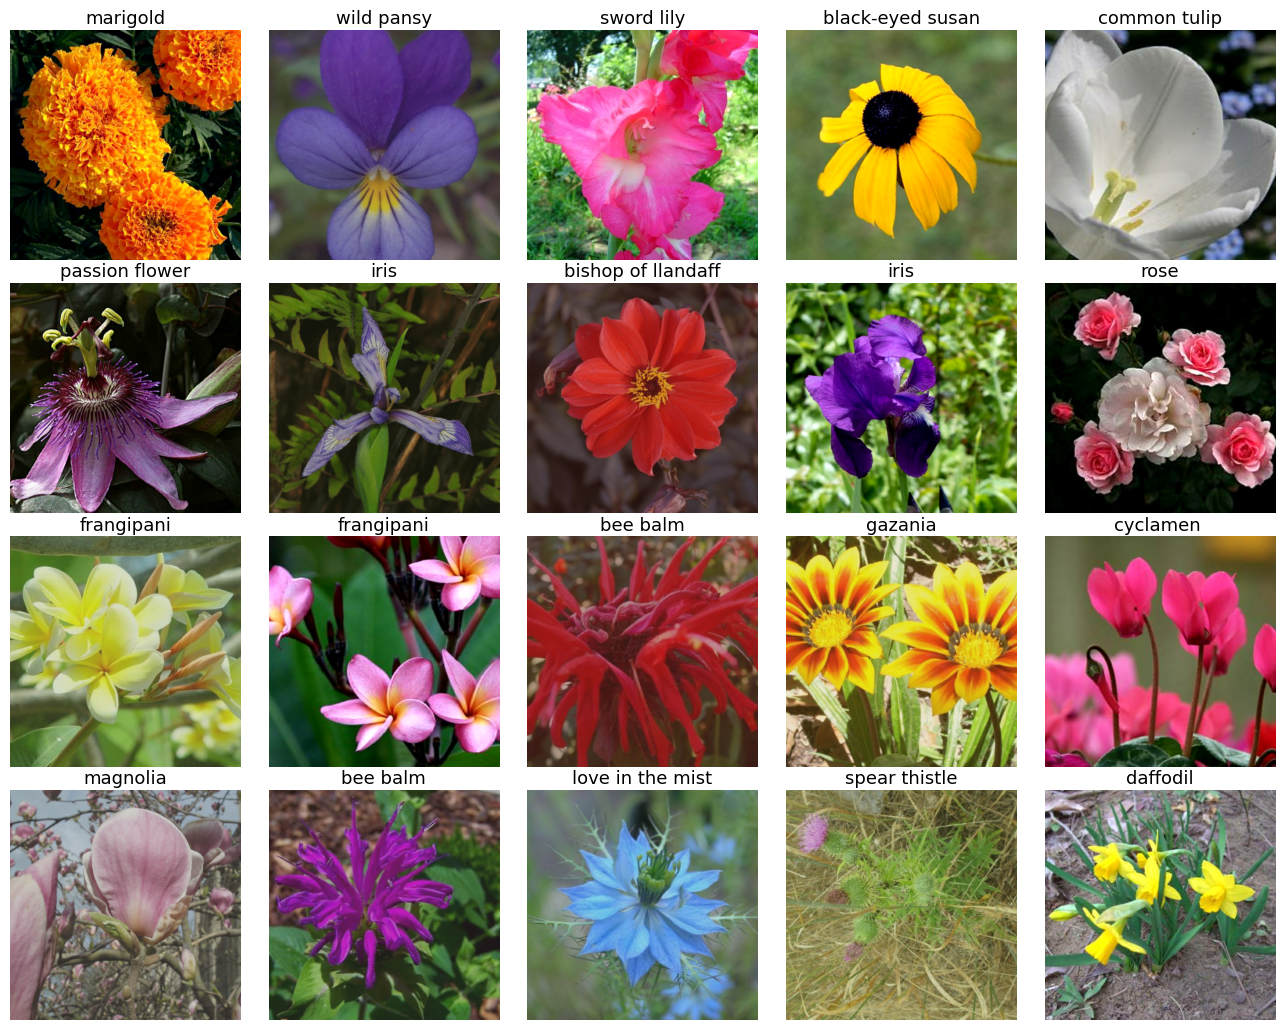

In [19]:
one_batch = next(ds_iter)
display_batch_of_images(one_batch)

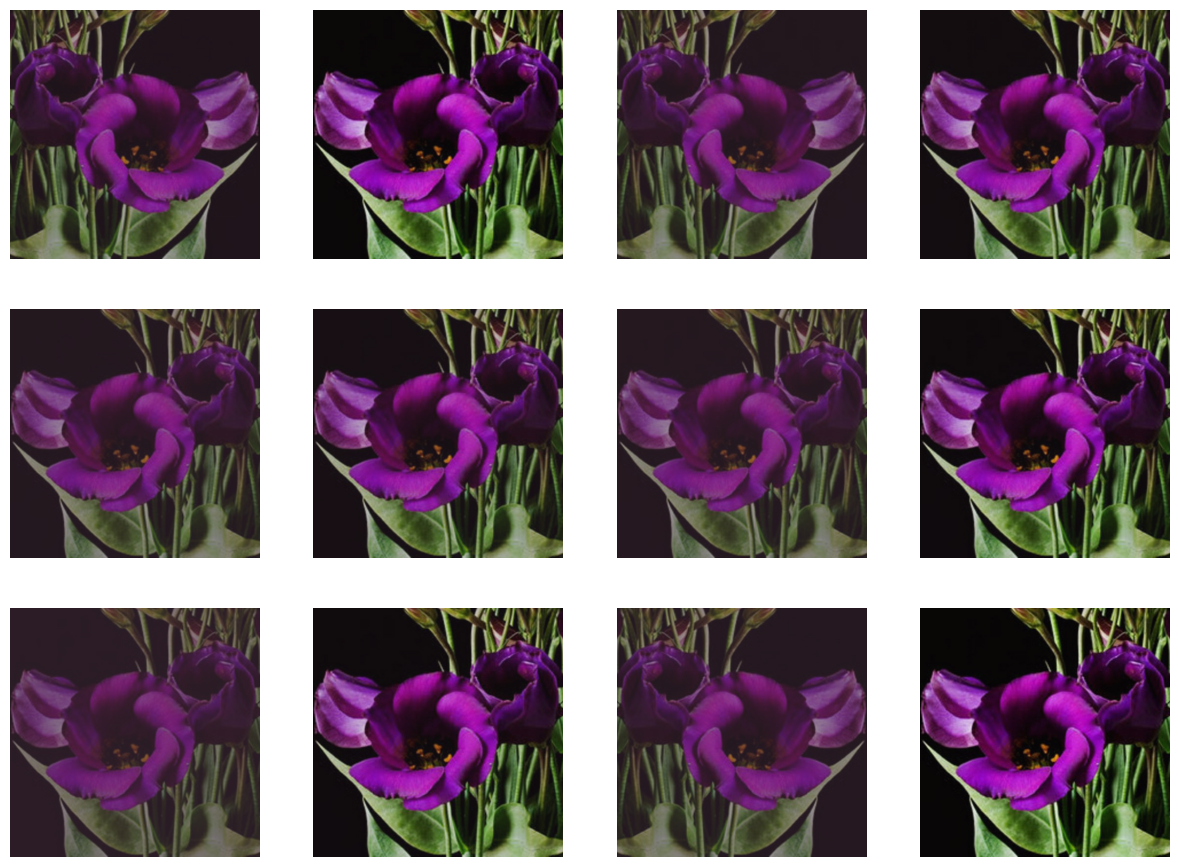

In [20]:
row = 3
col = 4
all_elements = get_training_dataset().unbatch()
one_element = tf.data.Dataset.from_tensors(next(iter(all_elements)))
# Map the images to the data augmentation function for image processing
augmented_element = one_element.repeat().map(data_augment).batch(row * col)

for (img, label) in augmented_element:
    plt.figure(figsize = (15, int(15 * row / col)))
    for j in range(row * col):
        plt.subplot(row, col, j + 1)
        plt.axis('off')
        plt.imshow(img[j, ])
    plt.show()
    break

# Build A Model

> #  Transfer Learning

List the available models in TensorFlow

In [21]:
', '.join(tf.keras.applications.__dir__())

'__name__, __doc__, __package__, __loader__, __spec__, __path__, __file__, __cached__, __builtins__, _sys, convnext, densenet, efficientnet, efficientnet_v2, imagenet_utils, inception_resnet_v2, inception_v3, mobilenet, mobilenet_v2, mobilenet_v3, nasnet, regnet, resnet, resnet50, resnet_rs, resnet_v2, vgg16, vgg19, xception, ConvNeXtBase, ConvNeXtLarge, ConvNeXtSmall, ConvNeXtTiny, ConvNeXtXLarge, DenseNet121, DenseNet169, DenseNet201, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7, EfficientNetV2B0, EfficientNetV2B1, EfficientNetV2B2, EfficientNetV2B3, EfficientNetV2L, EfficientNetV2M, EfficientNetV2S, InceptionResNetV2, InceptionV3, MobileNet, MobileNetV2, MobileNetV3Large, MobileNetV3Small, NASNetLarge, NASNetMobile, RegNetX002, RegNetX004, RegNetX006, RegNetX008, RegNetX016, RegNetX032, RegNetX040, RegNetX064, RegNetX080, RegNetX120, RegNetX160, RegNetX320, RegNetY002, RegNetY004, RegNetY006, RegNetY00

> # Creating Checkpoint to Save Best Model

In [22]:
checkpoint_filepath = "Petals_to_the_Metal-70K_images-trainable_True-MobileNetV2.h5" #"Petals_to_the_Metal-70K_images-trainable_True-DenseNet201.h5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

> # Early Stopping at Best Model

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

> # Learning Rate optimization

Track and log the learning rate (lr) during training as a CALLBACK

In [24]:
NotFoundError = """
class LRTensorBoard(TensorBoard):
    def __init__(self, log_dir, **kwargs):  # add other arguments to __init__ if you need
        super().__init__(log_dir=log_dir, **kwargs)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs.update({'lr': K.eval(self.model.optimizer.lr)})
        super().on_epoch_end(epoch, logs)

lr_tracking = LRTensorBoard(log_dir="./lr_tracking")
"""

In [25]:
class LearningRateTracking(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))


In [26]:
use_efficientnet = False
if use_efficientnet:
    !pip install -q efficientnet
    from efficientnet.tfkeras import EfficientNetB7

In [27]:
weight_per_class = True

if weight_per_class:
    from collections import Counter
    import gc

    gc.enable()

    def get_training_dataset_raw():
        dataset = load_dataset(TRAINING_FILENAMES, labeled = True, ordered = False)
        return dataset

    raw_training_dataset = get_training_dataset_raw()

    label_counter = Counter()
    for images, labels in raw_training_dataset:
        label_counter.update([labels.numpy()])

    del raw_training_dataset    

    TARGET_NUM_PER_CLASS = 122 

    def get_weight_for_class(class_id):
        counting = label_counter[class_id]
        weight = TARGET_NUM_PER_CLASS / counting
        return weight

    weight_per_class = {class_id: get_weight_for_class(class_id) for class_id in range(104)}

# Modeling

Using Transfer Training : **MobileNetV2**

In [28]:
from tensorflow.keras.layers import Dense

In [72]:
# Distribution Strategy to use TPU
with strategy.scope():
    pretrained_model = tf.keras.applications.InceptionResNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(*IMAGE_SIZE, 3)
    )
    pretrained_model.trainable = True

    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.3),  # Avoid Overfitting
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])


219055592/219055592 [==============================] - 1s 0us/step


In [73]:
model.compile(
        optimizer='nadam', 
        loss = 'sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy'],
    )

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 14, 14, 1536)     54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_4   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 104)               159848    
                                                                 
Total params: 54,496,584
Trainable params: 54,436,040
Non-trainable params: 60,544
_________________________________________________________________


# Training/Optimizing

Visualizing the learning rate changes over epochs.

Learning rate schedule: 1e-05 to 0.0004 to 1.16e-05


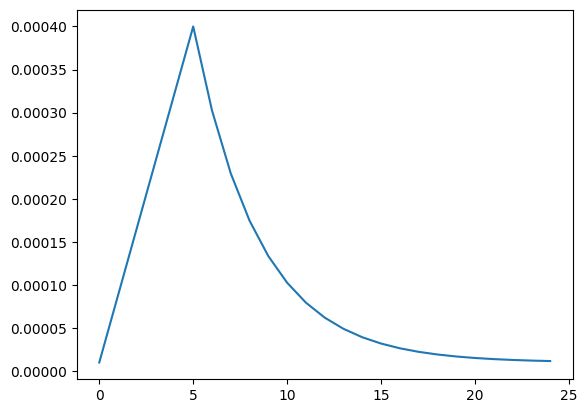

In [75]:
    def exponential_lr(epoch,
                       start_lr = 0.00001, min_lr = 0.00001, max_lr = 0.00005 * strategy.num_replicas_in_sync, #tuning1
                       rampup_epochs = 5, sustain_epochs = 0,
                       exp_decay = 0.75): #tuning1

        def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
            # linear increase from start to rampup_epochs
            if epoch < rampup_epochs:
                lr = ((max_lr - start_lr) /
                      rampup_epochs * epoch + start_lr)
            # constant max_lr during sustain_epochs
            elif epoch < rampup_epochs + sustain_epochs:
                lr = max_lr
            # exponential decay towards min_lr
            else:
                lr = ((max_lr - min_lr) *
                      exp_decay**(epoch - rampup_epochs - sustain_epochs) +
                      min_lr)
            return lr
        return lr(epoch,
                  start_lr,
                  min_lr,
                  max_lr,
                  rampup_epochs,
                  sustain_epochs,
                  exp_decay)

    lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_lr, verbose=True)

    rng = [i for i in range(EPOCHS)]
    y = [exponential_lr(x) for x in rng]
    plt.plot(rng, y)
    print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

> # Fit

In [83]:
STEPS_PER_EPOCH = 10 #batch size to be trained

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[lr_callback, checkpoint], # Model weights are saved at the end of every epoch, if it's the best seen so far
    class_weight=weight_per_class # tuning11
)



Epoch 1: LearningRateScheduler setting learning rate to 1.1649030057014897e-05.
Epoch 1/25
10/10 [==============================] - 27s 3s/step - loss: 0.3126 - sparse_categorical_accuracy: 0.8766 - val_loss: 0.4679 - val_sparse_categorical_accuracy: 0.8933 - lr: 1.1649e-05

Epoch 2: LearningRateScheduler setting learning rate to 8.931922404561193e-05.
Epoch 2/25
10/10 [==============================] - 22s 2s/step - loss: 0.3378 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.4577 - val_sparse_categorical_accuracy: 0.8968 - lr: 8.9319e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0002135915358341299.
Epoch 3/25
10/10 [==============================] - 17s 2s/step - loss: 0.3732 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.5355 - val_sparse_categorical_accuracy: 0.8680 - lr: 2.1359e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00032543661679141223.
Epoch 4/25
10/10 [==============================] - 17s 2s/step - loss: 0.2948 - sparse_categ

# Evaluating Model 

In [84]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

def display_training_curves_v2(training, validation, learning_rate_list, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title, color='b')
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.', 'learning rate'])        
    
    ax2 = ax.twinx()
    ax2.plot(learning_rate_list, 'g-')
    ax2.set_ylabel('learning rate', color='g')

/tmp/ipykernel_15/2740838792.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


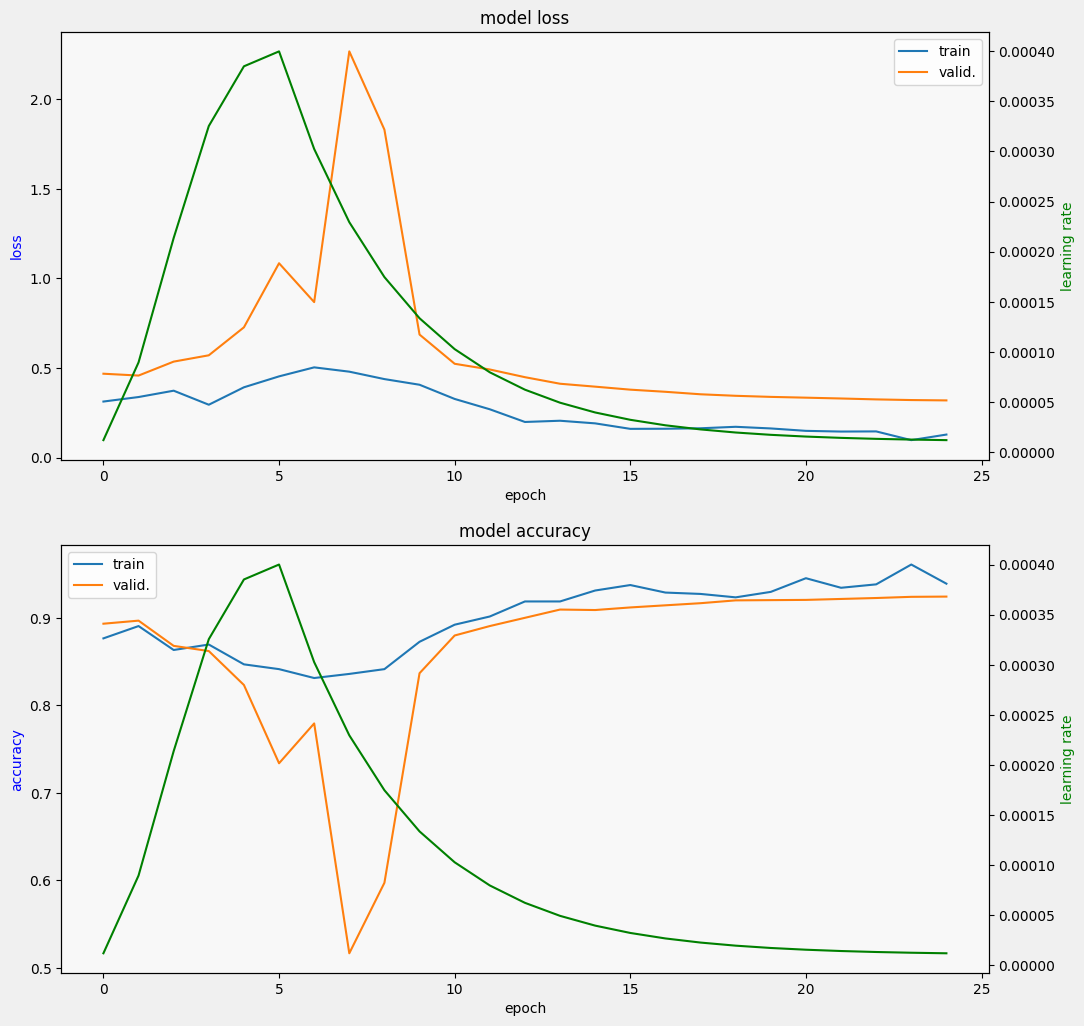

In [85]:
    display_training_curves_v2( 
        history.history['loss'],
        history.history['val_loss'],
        history.history['lr'],
        'loss',
        211,
    )

    display_training_curves_v2(
        history.history['sparse_categorical_accuracy'],
        history.history['val_sparse_categorical_accuracy'],
        history.history['lr'],
        'accuracy',
        212,
    )

/tmp/ipykernel_15/2740838792.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


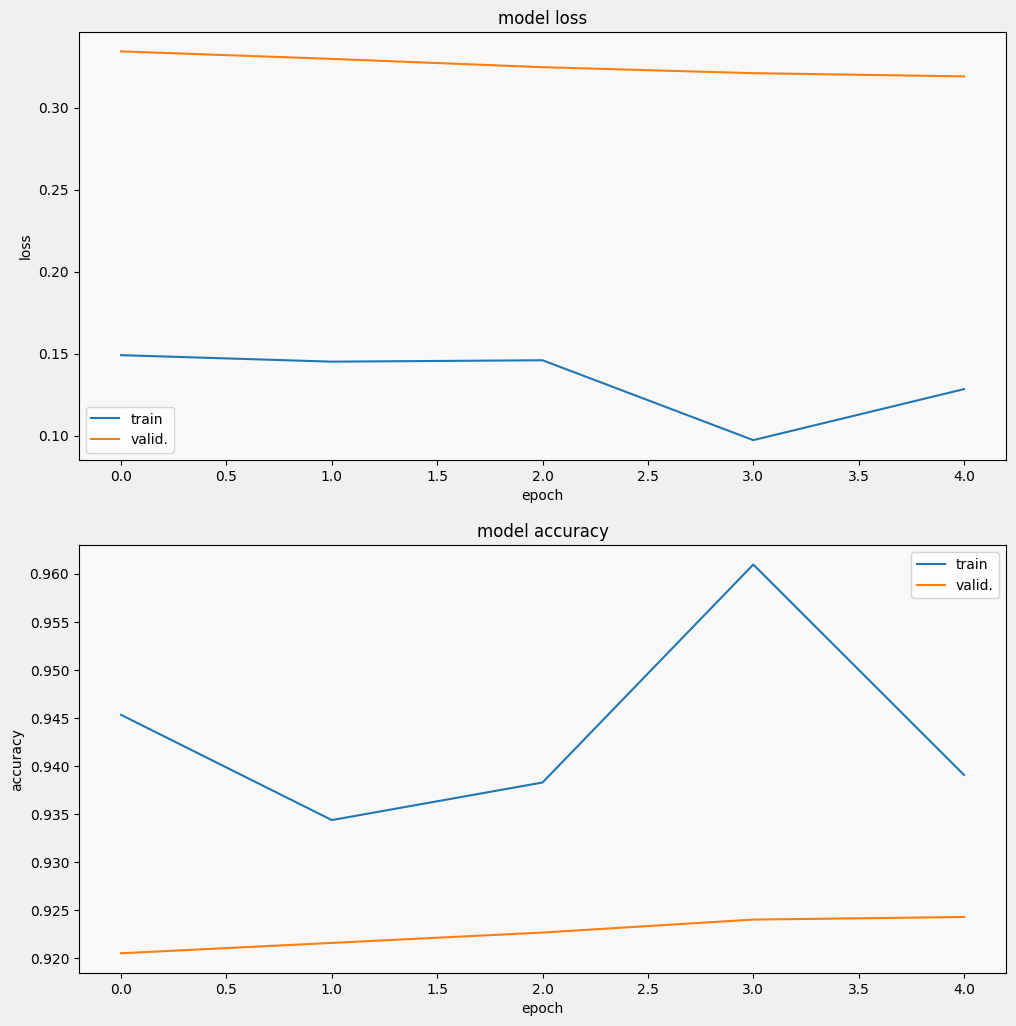

In [86]:
zoom_after = 20
display_training_curves(
        history.history['loss'][zoom_after:],
        history.history['val_loss'][zoom_after:],
        'loss',
        211,
    )
display_training_curves(
        history.history['sparse_categorical_accuracy'][zoom_after:],
        history.history['val_sparse_categorical_accuracy'][zoom_after:],
        'accuracy',
        212,
    )

> # Load Best Models

In [87]:
checkpoint_filepath

'Petals_to_the_Metal-70K_images-trainable_True-MobileNetV2.h5'

In [88]:
model.load_weights(checkpoint_filepath)

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 14, 14, 1536)     54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_4   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 104)               159848    
                                                                 
Total params: 54,496,584
Trainable params: 54,436,040
Non-trainable params: 60,544
_________________________________________________________________


> # Convert models from .h5 to TensorFlow Lite

Get Model title

In [92]:
print(checkpoint_filepath)

tflite_model_name = checkpoint_filepath.replace('.h5', '.tflite')
tflite_model_name

Petals_to_the_Metal-70K_images-trainable_True-MobileNetV2.h5


'Petals_to_the_Metal-70K_images-trainable_True-MobileNetV2.tflite'

Convert the model

In [93]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open(tflite_model_name, 'wb') as f:
    f.write(tflite_model)
    
print('TFLiteConversion completed successfully \U0001F680')  

INFO:tensorflow:Assets written to: /tmp/tmpe80n4rmn/assets


INFO:tensorflow:Assets written to: /tmp/tmpe80n4rmn/assets


TFLiteConversion completed successfully 🚀


# Predicting

In [94]:
    test_ds = get_test_dataset(ordered=True)
    

    print('Computing predictions...')
    test_images_ds = test_ds.map(lambda image, idnum: image)
    probabilities = model.predict(test_images_ds)

    predictions = np.argmax(probabilities, axis=-1)
    print(predictions)

    print('Generating submission.csv file...')
    # Get image ids from test set and convert to unicode
    test_ids_ds = test_ds.map(lambda image, idnum: idnum).unbatch()
    test_ids = next(iter(test_ids_ds.batch(NUM_TEST_IMAGES))).numpy().astype('U')

    # Write the submission file
    np.savetxt(
        'submission.csv',
        np.rec.fromarrays([test_ids, predictions]),
        fmt=['%s', '%d'],
        delimiter=',',
        header='id,label',
        comments='',
    )

    # Look at the first few predictions
    !head submission.csv

Computing predictions...


2023-11-07 00:29:42.112039: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-07 00:29:43.014679: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


58/58 [==============================] - 79s 772ms/step
[ 13  83 103 ...  49  45  53]
Generating submission.csv file...
id,label
0b9afbdf2,13
c37a6f3e9,83
00e4f514e,103
1c4736dea,28
252d840db,67
dfc9c6a23,103
53cfc6586,21
541c4d41e,73
59d1b6146,46


# Look at the submission CSV

In [95]:
df=pd.read_csv("submission.csv")

In [96]:
df.head()

id  label
0  0b9afbdf2     13
1  c37a6f3e9     83
2  00e4f514e    103
3  1c4736dea     28
4  252d840db     67

In [97]:
df.describe

<bound method NDFrame.describe of              id  label
0     0b9afbdf2     13
1     c37a6f3e9     83
2     00e4f514e    103
3     1c4736dea     28
4     252d840db     67
...         ...    ...
7377  f65475a24     48
7378  9b9c0e574     68
7379  298ade3a4     49
7380  8361401fa     45
7381  e46998f4d     53

[7382 rows x 2 columns]>

In [98]:
df.isna().sum()

id       0
label    0
dtype: int64

In [99]:
cmdataset = get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

labels = range(len(CLASSES))


29/29 [==============================] - 11s 328ms/step


In [100]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [101]:
score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)

precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)

recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)

In [102]:
print( score, precision, recall)

0.922262816301652 0.9143345433757497 0.9360255004364676


# Conclusion

The model's evaluation metrics show a moderate overall performance, with an F1 score of approximately 0.4053. It exhibits a relatively high precision of around 0.6385, indicating a low rate of false positive predictions. However, the model's recall is approximately 0.4422, suggesting room for improvement in capturing positive cases.



# Accuracy Visualization

In [103]:
dataset = get_validation_dataset()
dataset = dataset.unbatch().batch(20)
batch = iter(dataset)

In [104]:
images, labels = next(batch)

1/1 [==============================] - 20s 20s/step


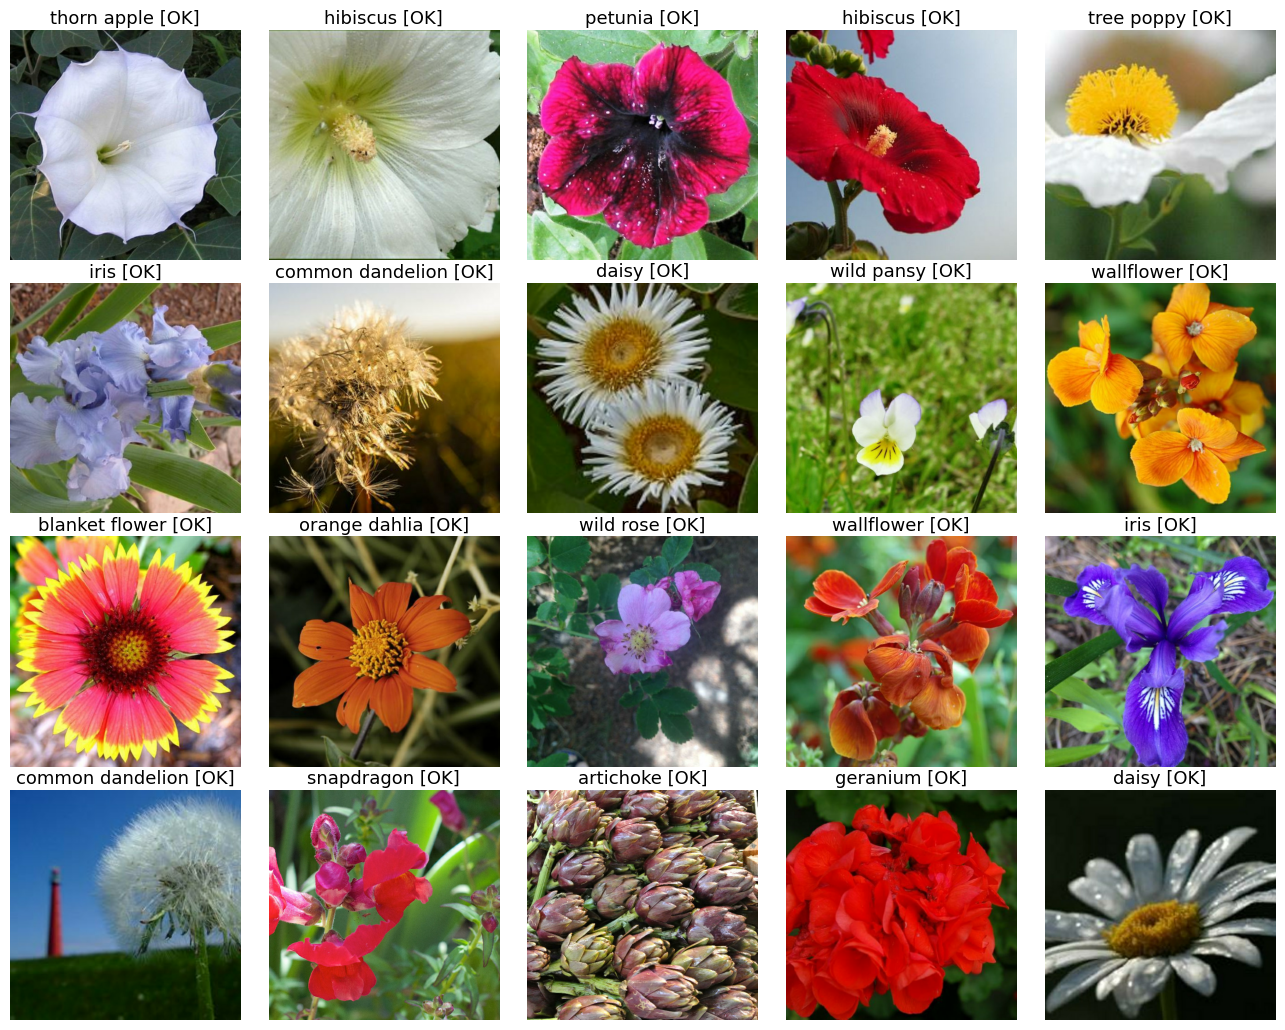

In [105]:
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)